# Download the data

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "01")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Creates `HOUSING_PATH`, Downloads & Extracts the contents of `HOUSING_URL` into `HOUSING_PATH`
    
    # Arguments:
        housing_url, string: the download link
        housing_path, string: where to download & extract data
    """
    os.makedirs(name=housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(url=housing_url, filename=tgz_path)
    housing_tgz = tarfile.open(name=tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    """Loads Housing data into a pandas dataframe.
    
    # Arguments:
        housing_path: the path where `housing.csv` exists
    
    # Returns:
        data, pd.DataFrame: the housing data as a pandas dataframe
    """
    data_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(data_path)

# Data Structure

In [7]:
housing = load_housing_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Looking at the statistics for the non-numeric values

housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# Looking a the basic statistics about the data

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

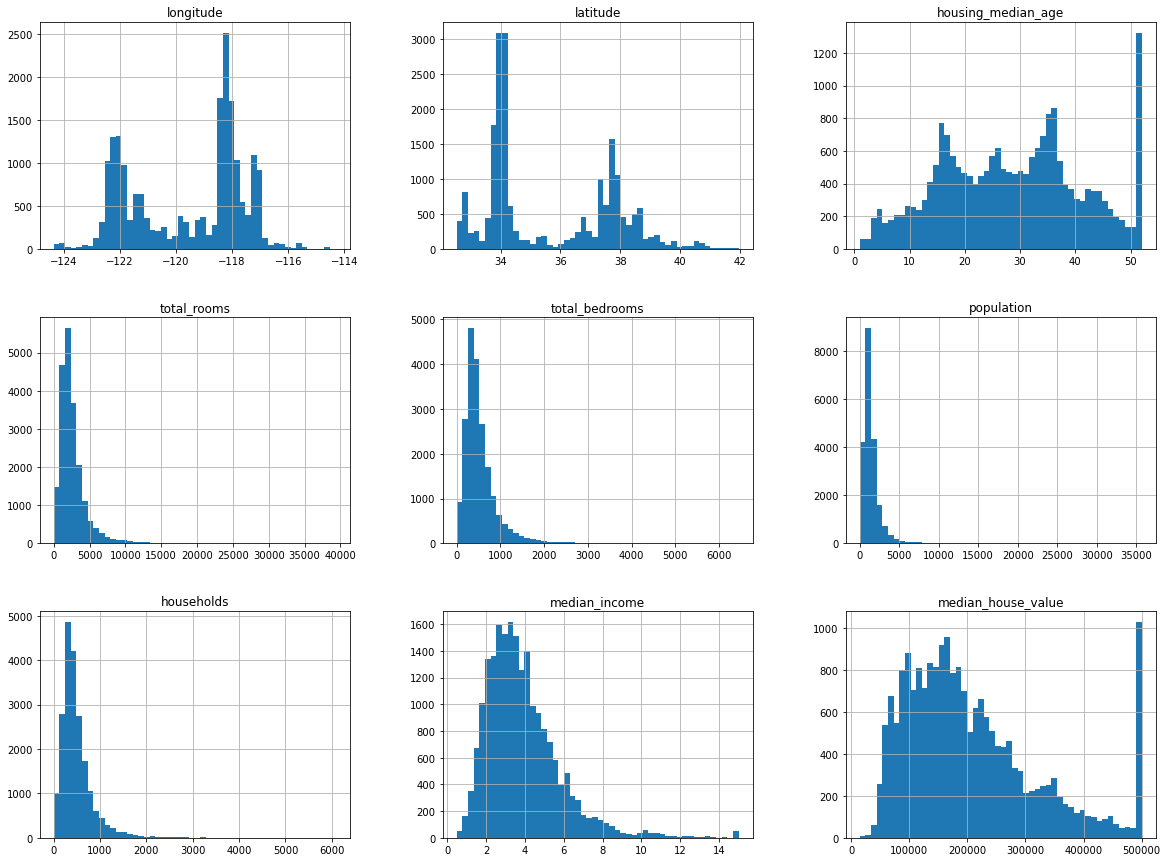

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
import numpy as np

# Create a Test Set

In [15]:
def split_train_test(data, test_ratio=0.2):
    """Splits a dataset into train/test using a `test_ratio`.
    
    # Arguments
        data, pd.DataFrame: the whole dataset.
        test_ratio, float: the percentage taken from the original dataset as a test set.
    
    # Returns
        train, pd.DataFrame: the training set.
        test, pd.DataFrame: the test set.
    """
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
# you can then use the function like this
train_set, test_set = split_train_test(data=housing)
len(train_set), len(test_set)

(16512, 4128)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [19]:
housing['income_cat'] = pd.cut(x=housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

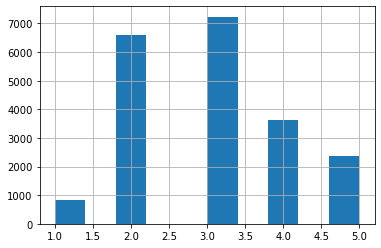

In [20]:
# visualize the categories
housing['income_cat'].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [23]:
for train_index, test_index in split.split(X=housing, y=housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

<AxesSubplot:>

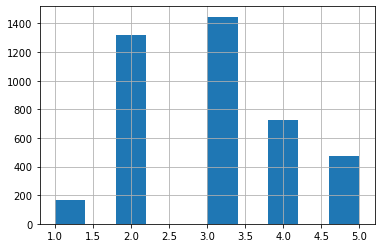

In [24]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)
strat_test_set['income_cat'].hist()

In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [26]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

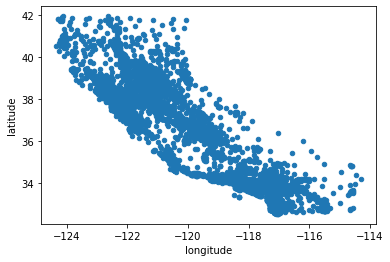

In [27]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

# Data Visualization

In [28]:
housing=strat_train_set.copy()

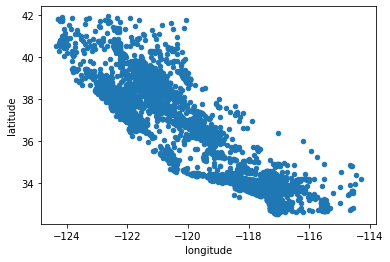

In [29]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

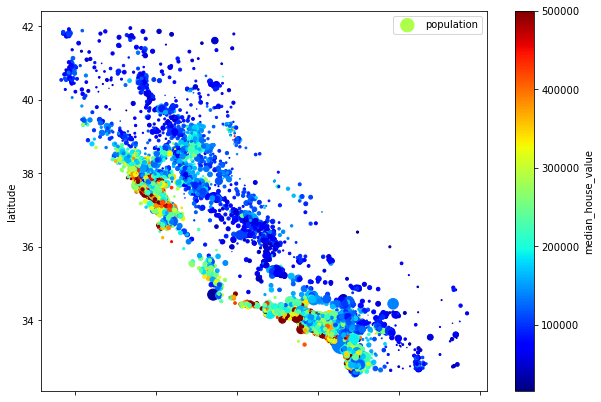

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=1, s=housing['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

In [31]:
housing[['population', 'median_house_value']].corr()

,population,median_house_value
population,1.00000,-0.02692
median_house_value,-0.02692,1.00000


# Looking for Correlations

In [32]:
display(housing)
corr_matrix = housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [33]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [34]:
from pandas.plotting import scatter_matrix

In [35]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

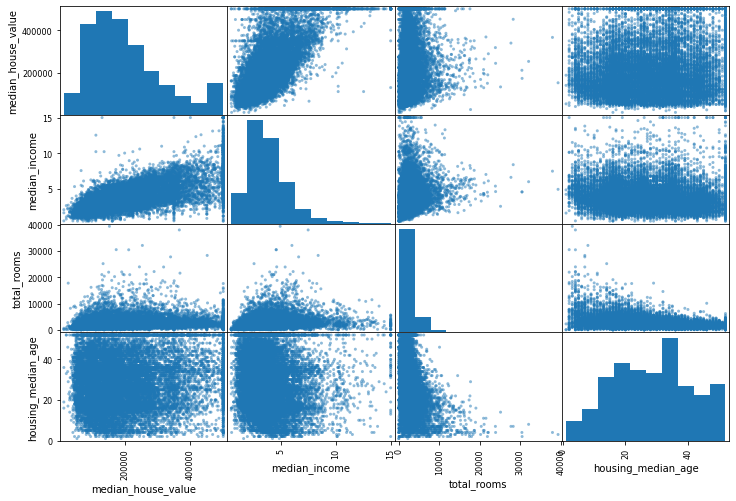

In [36]:
scatter_matrix(frame=housing[attributes], figsize=(12, 8))
plt.show()

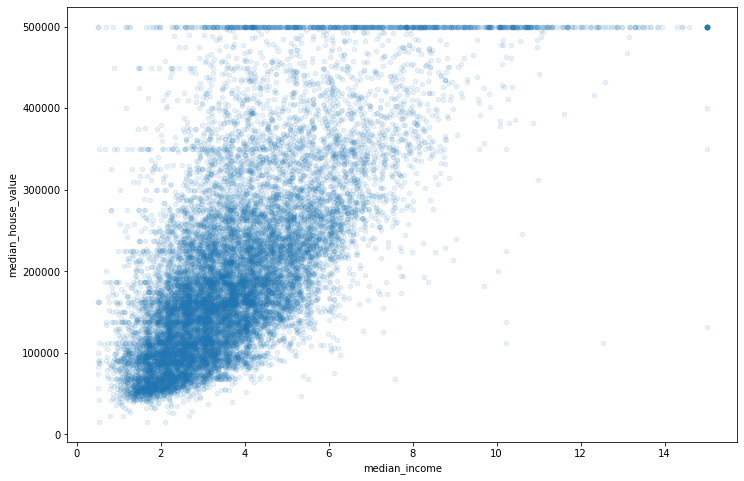

In [37]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(12,8), alpha=0.1)
plt.show()

 Experiment with Attribute combinations

In [38]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [39]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_ratio             -0.259984
Name: median_house_value, dtype: float64

# Data Cleaning

In [40]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.shape, housing_labels.shape

((16512, 9), (16512,))

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer = SimpleImputer(strategy='median')

In [43]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
X = imputer.transform(housing_num)
X.shape

(16512, 8)

In [48]:
housing_tr = pd.DataFrame(data=X, index=housing_num.index, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


# Handling text and categorical attributes

In [49]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [50]:
housing_cat['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
ordinal_encoder = OrdinalEncoder()

In [53]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values)
housing_cat_encoded.shape

(16512, 1)

In [54]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [55]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
one_hot_encoder = OneHotEncoder()

In [58]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat.values)
housing_cat_1hot.shape

(16512, 5)

In [59]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [60]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Feature scaling and transformation

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
print(housing_num_min_max_scaled)

[[-0.50996016  0.00956429  0.45098039 ... -0.96036884 -0.87415982
  -0.69596281]
 [-0.51792829 -0.04144527 -0.49019608 ... -0.98301522 -0.95855116
  -0.18325264]
 [ 0.42430279 -0.95111583  0.17647059 ... -0.94770033 -0.82823002
  -0.6741838 ]
 ...
 [ 0.58366534 -0.67056323 -0.68627451 ... -0.88256397 -0.71508588
  -0.61760527]
 [ 0.26294821 -0.72794899  0.17647059 ... -0.92415707 -0.8678118
  -0.50861367]
 [-0.62151394  0.11158342  1.         ... -0.92903389 -0.76213592
  -0.57585413]]


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
display(housing_num_std_scaled)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [67]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 8)

In [68]:
from sklearn.pipeline import make_pipeline

In [69]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [70]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 8)

# ColumnTransformer

In [71]:
from sklearn.compose import ColumnTransformer

In [72]:
num_attribs =["longitude", "latitude", "housing_median_age", "total_rooms","total_bedrooms",
              "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

In [73]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

In [74]:
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown="ignore"))

In [75]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [76]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 13)

# Select & Train a Model

In [77]:
from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X=housing_prepared,y=housing_labels)


LinearRegression()

Let's try the model on a few instances from the training set:

In [78]:
some_data = housing.iloc[:5]

In [79]:
some_labels = housing_labels.iloc[:5]

In [80]:
some_data_prepared = full_pipeline.transform(some_data)

In [81]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [211574.39523833 321345.10513719 210947.519838    61921.01197837
 192362.32961119]


In [82]:
print("Labels: ", some_labels.tolist())

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let's measure the performance of our model using the RMSE metric.

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
housing_predictions = lin_reg.predict(housing_prepared)

In [85]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [86]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

Most districts median housing values range between 120K to 265K, so an average error of 68K is not good.

This is an example of a model overfitting the data. When this happens, it can mean two things:

The features do not provide enough information to make better predictions.
The model is not powerful enough, meaning its hypothesis space is narrow.
The main ways to tackle underfitting:

To feed the model better features.
To select a more powerful model.
To loosen the model's restrictions.

This model is not regularized, which rules out the last option. We could try to input more features, but let's start by testing a more powerful model.

Let's try out DecisionTreeRegressor, this is a powerful model, capable of finding non-linear relationships within the data:

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
tree_reg = DecisionTreeRegressor()

In [89]:
tree_reg.fit(X=housing_prepared, y=housing_labels)

DecisionTreeRegressor()

In [90]:
housing_predictions = tree_reg.predict(housing_prepared)

In [91]:
tree_mse = mean_squared_error(y_true=housing_labels, y_pred=housing_predictions)

In [92]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

It is either the model is absolutely perfect, or it badly overfit the data.

As we know, we shouldn't touch the test set until we are ready for deployment. The solution is to partition the training data itself and extract a validation set.

# Better Evaluation using Cross-Validation

One way to evaluate our model is to use train_test_split() again on the training set, extract a validation set and evaluate our iterative models on it.

A great alternative is to use K-fold cross-validation. We randomly split the training data into 10 folds, we iteratively train the model on 9 folds and evaluate on 1, doing this 10 times.

We will endup with 10 metric scores:

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
scores = cross_val_score(estimator=tree_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [95]:
tree_rmse_scores = np.sqrt(-scores)

scikit-learn's cross validation features expect a utility function (the greater the better) rather than a cost function (the lower the better). That's why we used ned_mean_squared_error and we negated it at RMSE evaluation

In [96]:
def display_scores(scores):
    """Displays the scores, their mean, and the standard deviation.
    
    # Arguments:
        scores, np.array: list of scores given by the cross validation procedure.
    """
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [97]:
display_scores(tree_rmse_scores)

Scores: [66793.92898811 66320.31168998 73989.69941516 69654.85431512
 68025.2190964  76297.31921005 67732.99938441 70427.49414536
 69287.11422929 69339.27407446]
Mean: 69786.82145483316
Standard Deviation: 2987.0415161941887


The decision tree seems to perform worse than the linear regression model!

We should notice that cross validation allows us to not only get an estimate of the performance of your model (mean), but how precise it is (std). We would not have this estimation if we used only one validation set. However, cross-validation comes at the cost of training the model several times, which is not always possible.

Let's compute the same scores for the linear regression model just to be sure:

In [98]:
scores = cross_val_score(estimator=lin_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [99]:
lin_rmse_scores = np.sqrt(-scores)

In [100]:
display_scores(lin_rmse_scores)

Scores: [67450.42057782 67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865]
Mean: 69223.18594556303
Standard Deviation: 2657.2683112776954


That's right! the decision tree model is overfitting so badly that it performs worse than the linear regression model.

Let's try one last model now, the random forest regressor. Random forests work by training many decision trees on random feature subsets then average out their predictions.

Building a model on top of many other models is called Ensemble Learning.

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
forest_reg = RandomForestRegressor()

In [103]:
forest_reg.fit(X=housing_prepared, y=housing_labels)

RandomForestRegressor()

In [104]:
forest_mse = mean_squared_error(y_true=housing_labels, y_pred=forest_reg.predict(X=housing_prepared))

In [105]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18393.182064923083

In [106]:
scores = cross_val_score(estimator=forest_reg, X=housing_prepared, 
                         y=housing_labels, scoring='neg_mean_squared_error', cv=10)

In [107]:
forest_rmse_scores = np.sqrt(-scores)

In [108]:
display_scores(scores=forest_rmse_scores)

Scores: [47825.67088291 46118.08274796 49266.29617078 50019.17461009
 49320.20133667 53168.30064247 48485.4335438  50344.88276006
 51429.76243789 49424.83837217]
Mean: 49540.26435048076
Standard Deviation: 1830.5805456345183


This is much better, random forests seem very promissing. We should notice, however, that the RMSE on the training set is still much lower then the validation RMSE, meaning the model overfitted, but not as badly as the decision tree model. Possible solutions to overfitting are:

Getting more training data
Simplifying the model
Regularizing the model

We can easily save scikit-learn models using Python's joblib:

In [109]:
import joblib

In [110]:
joblib.dump(value=forest_reg, filename='data/01/forest_reg.m')

['data/01/forest_reg.m']

In [111]:
# & later
forest_reg = joblib.load(filename='data/01/forest_reg.m')

# Fine-Tune Your Model

Grid Search

One option would be to try out many hyper-parameters manually, but this would be considered tedious work and we might not even have the time to do it. Instead, we should just use scikit-learn's GridSearchCV.

We just tell it which hyper-parameters and values to test and it will test out all combinations of hyper-parameters and use cross-validation for evaluation.

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [114]:
forest_reg = RandomForestRegressor()

In [115]:
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, scoring='neg_mean_squared_error', 
                           cv=5, return_train_score=True, n_jobs=-1)

In [116]:
grid_search.fit(X=housing_prepared, y=housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [117]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [118]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

When GridSearchCV finds the best estimator, it will retrain it on the whole training set. This can be controlled by the parameter refit=True (by default)

Re-training the best model on the whole training data is generally a good practice. & ofcoures, the evaluation scores are also available:

In [119]:
cvres = grid_search.cv_results_

In [120]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64182.626398721164 {'max_features': 2, 'n_estimators': 3}
55509.71024259878 {'max_features': 2, 'n_estimators': 10}
53037.820304192865 {'max_features': 2, 'n_estimators': 30}
61131.705868884375 {'max_features': 4, 'n_estimators': 3}
52985.74671431607 {'max_features': 4, 'n_estimators': 10}
50655.85339566692 {'max_features': 4, 'n_estimators': 30}
59125.81989122522 {'max_features': 6, 'n_estimators': 3}
52361.049207408614 {'max_features': 6, 'n_estimators': 10}
50565.0310554062 {'max_features': 6, 'n_estimators': 30}
58639.13874214688 {'max_features': 8, 'n_estimators': 3}
52175.13662475898 {'max_features': 8, 'n_estimators': 10}
50282.36307261002 {'max_features': 8, 'n_estimators': 30}
63064.4596237726 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54153.22650983236 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60525.78043358924 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53013.83048277761 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

Randomized Search


The grid search is fine when you're exploring a few hyper-parameter combinations, but when the search space is big though, it is better to use RandomizedSearchCV instead. It works almost in the same way of a grid search, but it try out a limited randomly selected number of hyper-paraemeters for each iteration. This approach has two main benefits:

If we let this approach run for 1,000 iterations, it will explore 1,000 values for each hyper-parameters, instead of combining each unique value.
By setting the number of iterations, we can control computing resources much more effectively than doing Grid search.

Ensemble Methods


Another way to fine-tune your model is to combine the models that work best. Usually, the ensemble model will perform better than any part of the model, especially if its models are producing different errors.

Analyze the best models & their errors

We will often gain good insights about the problem by inspecting good models. For example, the random forest model can give us estimates over feature importance:

In [121]:
feature_importances = grid_search.best_estimator_.feature_importances_
(feature_importances*100).astype(int)

array([11, 10,  4,  2,  2,  3,  2, 43,  1, 16,  0,  0,  0])

In [122]:
extra_attribs= ["rooms_per_household","bedrooms_ratio","population_per_household"]

In [123]:
attributes = num_attribs + cat_attribs+extra_attribs

In [124]:
# sorted(zip(feature_importances, attributes), reverse=True)
dict(zip(feature_importances, attributes))

{0.11333565804440295: 'longitude',
 0.10426586897666444: 'latitude',
 0.04912884527358763: 'housing_median_age',
 0.029891427075796912: 'total_rooms',
 0.02771054174758351: 'total_bedrooms',
 0.038263923165161834: 'population',
 0.025633934020732815: 'households',
 0.4310649498101075: 'median_income',
 0.0126513975954321: 'ocean_proximity',
 0.16114025494545708: 'rooms_per_household',
 3.414534028015413e-05: 'bedrooms_ratio',
 0.0016861754468726474: 'population_per_household'}

# Evaluate your system on the test set

In [125]:
final_model = grid_search.best_estimator_

In [126]:
X_test = strat_test_set.drop(labels='median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [127]:
X_test_prepared = full_pipeline.transform(X=X_test)

we reproduce the same steps you used with training data to benchmark the model.

However, we should call transform(), and not fit_transform()

In [128]:
final_predictions = final_model.predict(X=X_test_prepared)

In [129]:
final_mse = mean_squared_error(y_true=y_test, y_pred=final_predictions)

In [130]:
final_rmse = np.sqrt(final_mse)
final_rmse

47058.646999098746

In some cases, such a point estimate of the generalization error won't be enough for us to launch it in production. We might want to create a confidence interval of 95% around the metric.

For this, we use the individual predictions for each test set element.

In [131]:
from scipy import stats

In [132]:
confidence = .95

In [133]:
squared_errors = (y_test - final_predictions) ** 2

In [134]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                         loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45153.51322639, 48889.59764701])

# Launch, Monitor, & Maintain your system